In [1]:
import pandas as pd

In [39]:
df = pd.read_csv("All orders - short custom description.csv")
df = df[(df['date'] >= '2022-01-01') & (df['date'] <= '2023-12-31')]
df = df[(df['order_state'] == 'Order Dispatched') | (df['order_state'] == 'Order Refunded')]
df = df[df['attribute_summary'] != 'Size: ladies']
df = df[df['attribute_summary'] != 'Size: One Size']
df = df[df['Channel'] == 'Leather Company']

df.rename(columns={'attribute_summary': 'Size'}, inplace=True)
temp_df = df['Size'].str.split(': ', expand=True)
temp_df.columns = ['F_Size', 'Size']
df['Size'] = temp_df['Size']

df = df.sort_values(by='date').reset_index(drop=True)
df['colour'] = df['colour'].str.capitalize()
# df.tail()

C:\Users\retai\AppData\Local\Temp\ipykernel_23124\2688595086.py:1: DtypeWarning: Columns (1,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("All orders - short custom description.csv")


In [40]:
# Mens Leather Jackets

slim_fit = ['Leather Jacket Tan : Edinburgh', 'Edinburgh Timber Leather Jacket',
            'Edinburgh Black Leather Jacket', 'Brontes Timber- Leather Coat',
            'Leather Coat Black : Brontes', 'Leather Hooded Bomber Jacket  Black : Addison',
            'Soltau Black Leather Biker Jacket', 'Soltau Timber Leather Biker Jacket',
            'Brampton Leather Biker Jacket Tan: Hartside', 'Leather Biker Jacket Bordeaux  :  Viking',
            'Mens  Leather Biker Jacket Black: Axel', 'Leather Biker Jacket Bordeaux: Balmin',
            'Leather Coat Tan : Brontes', 'Mens Leather Biker Jacket Black: BR FONS-1',
            'Mens Brampton Leather Biker Jacket Timber: Hartside', 'Mens  Leather Biker Jacket Burgundy: Axel',
            'Leather Biker Jacket Black: Brandon', 'Leather Biker Jacket Black: Spartan',
            'Ashwood Luxury Leather Biker Jacket Veggie Tan: Andriy', 'Soltau Tan Leather Biker Jacket',
            'Mens  Leather Biker Jacket Tan: Axel', 'Leather Biker Jacket Red/ Black : Brandon',
            "Men's Leather Hooded Bomber Jacket Tan: Addison", 'Leather Biker Jacket Black/ Tan: Kingston',
            'Trapper Leather Jacket Black : Largo', 'Leather Vintage Biker Jacket Tan : Stedman', 
            ]

regular_fit = ['Leather Biker Jacket Timber : Bronx', 'Leather Bomber Jacket  Black : Danny',
               'Leather Biker Jacket Tan : Bronx', 'Vintage Leather Biker Jacket Blue/ Black :  Jaxon',
               'Leather Biker Jacket Black : Bronx', 'Leather Biker Jacket White : Berlin',
               'Monomoi Mens Leather Biker Jacket Black/red: Bravo', 'Monomoi Hooded Leather Jacket Black: Maxson',
               'Monomoi Mens Leather Denim Style Jacket Blue: James', 'Leather Biker Jacket Black: Hard Knott',
               'Monomoi Mens Leather Biker Jacket Black: Hudson', 'Suede Bomber Jacket Tan: Jacks Hill',
               'Trapper Mens Nappa Leather Jacket Black: Jason', 'Monomoi Mens Hooded Leather Jacket Tan: Di Franco',
               'Leather Biker Jacket White : Brody', 'Trapper Mens Nappa Leather Jacket Red Brown: Joshua',
               'Monomoi Mens Hooded Leather Jacket Green: Di Franco', 'Suede Bomber Jacket Navy: Jacks Hill',
               'Leather Pilot Jacket With Detachable Collar Cognac: Justin', 'Leather Fight Club Jacket Black : Durden',
               'Monomoi Mens Hooded Leather Jacket Black: Di Franco', 'Leather Biker Jacket Nevada : Bronx',
               'Trapper Mens Nappa Leather Jacket Red Brown: Jason', 'Suede Bomber Jacket Brown: Jacks Hill',
               'Monomoi Mens Hooded Leather Jacket Stone Wash: Di Franco', 'Monomoi Mens Hooded Leather Jacket Red: Di Franco',
               'Monomoi Hooded Leather Jacket Navy: Maxson', 'Mens Leather Hodded Jacket Black: Super Bomber',
               'Monomoi Leather Jacket Black: Rayan', 'Mens Vintage Biker Leather Jacket Black : Kelly',
               'Mens Leather Fashion Biker Jacket White: Stefan',
               ]

loose_fit = ['Leather Jacket Black/nap : Ferdinand', 'Leather Jacket Black : Ferdinand',
             'Fenland Mens Nubuck Leather Jacket Brown:  Carter', 'Fenland Mens Nubuck Leather Jacket Rust:  Carter',
             ]

In [41]:
# df[df['customs_description'] == 'Mens > Leather Jackets']['attribute_summary'].value_counts()
temp_men = df[df['customs_description'] == 'Mens > Leather Jackets']['Size'].value_counts().to_frame('count').join(df[df['customs_description'] == 'Mens > Leather Jackets']['Size'].value_counts(normalize=True).to_frame('%'))
temp_men['%'] = 100 * temp_men['%']
temp_men['%'] = temp_men['%'] / 4
temp_men['%'] = temp_men['%'].round(0)
temp_men['%'] = temp_men['%'].astype(int)
temp_men = temp_men.sort_values(by='Size')
temp_men['%']

Size
2XL    3
3XL    2
4XL    1
5XL    1
6XL    1
7XL    0
8XL    0
9XL    0
L      5
M      5
S      2
XL     4
XS     1
XXS    0
Name: %, dtype: int32

In [42]:
# df[df['customs_description'] == 'Mens > Leather Jackets']['attribute_summary'].value_counts()
temp_men_regular_fit = df[df['title'].isin(regular_fit)]
print(temp_men_regular_fit.shape)
temp_men = temp_men_regular_fit[temp_men_regular_fit['customs_description'] == 'Mens > Leather Jackets']['Size'].value_counts().to_frame('count').join(temp_men_regular_fit[temp_men_regular_fit['customs_description'] == 'Mens > Leather Jackets']['Size'].value_counts(normalize=True).to_frame('%'))
temp_men['%'] = 100 * temp_men['%']
temp_men['%'] = temp_men['%'] / 4
temp_men['%'] = temp_men['%'].round(0)
temp_men['%'] = temp_men['%'].astype(int)
temp_men = temp_men.sort_values(by='Size')
temp_men['%']

(676, 22)


Size
2XL    4
3XL    2
4XL    2
5XL    0
6XL    0
L      5
M      4
S      3
XL     4
XS     1
Name: %, dtype: int32

In [43]:
# df[df['customs_description'] == 'Mens > Leather Jackets']['attribute_summary'].value_counts()
temp_men_slim_fit = df[df['title'].isin(slim_fit)]
print(temp_men_slim_fit.shape)
temp_men = temp_men_slim_fit[temp_men_slim_fit['customs_description'] == 'Mens > Leather Jackets']['Size'].value_counts().to_frame('count').join(temp_men_slim_fit[temp_men_slim_fit['customs_description'] == 'Mens > Leather Jackets']['Size'].value_counts(normalize=True).to_frame('%'))
temp_men['%'] = 100 * temp_men['%']
temp_men['%'] = temp_men['%'] / 4
temp_men['%'] = temp_men['%'].round(0)
temp_men['%'] = temp_men['%'].astype(int)
temp_men = temp_men.sort_values(by='Size')
temp_men['%']

(1353, 22)


Size
2XL    3
3XL    2
4XL    1
5XL    1
6XL    1
7XL    0
8XL    0
L      6
M      5
S      2
XL     4
XS     1
Name: %, dtype: int32

In [38]:
# df[df['customs_description'] == 'Ladies > Leather Jackets']['attribute_summary'].value_counts()
temp_ladies = df[df['customs_description'] == 'Ladies > Leather Jackets']['Size'].value_counts().to_frame('count').join(df[df['customs_description'] == 'Ladies > Leather Jackets']['Size'].value_counts(normalize=True).to_frame('%'))
temp_ladies['%'] = 100 * temp_ladies['%']
temp_ladies['%'] = temp_ladies['%'] / 4
temp_ladies['%'] = temp_ladies['%'].round(0)
temp_ladies['%'] = temp_ladies['%'].astype(int)
temp_men = temp_men.sort_values(by='Size')
temp_ladies['%']

Size
14    5
12    5
16    4
10    3
18    3
20    2
8     1
22    1
24    1
6     0
26    0
Name: %, dtype: int32

In [5]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date').reset_index(drop=True)
df['Month'] = df['date'].dt.month_name()
temp = df[df['customs_description'] == 'Mens > Leather Jackets'].groupby(['Month', 'colour'])['quantity'].sum().reset_index()
temp.sort_values(by='quantity', ascending=False)

,Month,colour,quantity
44,December,Black,306
194,November,Black,264
63,December,Tan,190
213,November,Tan,172
221,October,Black,164
...,...,...,...
138,June,Cream,1
54,December,Gray,1
139,June,Ginger,1
121,July,Ginger,1


In [6]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
temp = df[df['customs_description'] == 'Mens > Leather Jackets']
temp = temp.groupby(['colour', 'Month'])['quantity'].size().groupby(
    level=1).nlargest(5).reset_index(-1, drop=True).reindex(new_order, level=0)
# temp = temp.to_frame()
temp.to_excel('Mens Leather Jackets.xlsx')

In [7]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
temp = df[df['customs_description'] == 'Ladies > Leather Jackets']
temp = temp.groupby(['colour', 'Month'])['quantity'].size().groupby(
    level=1).nlargest(5).reset_index(-1, drop=True).reindex(new_order, level=0)
# temp = temp.to_frame()
temp.to_excel('Ladies Leather Jackets.xlsx')

In [8]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
temp = df[df['customs_description'] == 'Mens > Leather Jackets']
temp = temp.groupby(['Size', 'Month'])['quantity'].size().groupby(
    level=1).nlargest(5).reset_index(-1, drop=True).reindex(new_order, level=0)
temp.to_excel('Size Mens Leather Jackets.xlsx')

In [9]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
temp = df[df['customs_description'] == 'Ladies > Leather Jackets']
temp = temp.groupby(['Size', 'Month'])['quantity'].size().groupby(
    level=1).nlargest(5).reset_index(-1, drop=True).reindex(new_order, level=0)
temp.to_excel('Size Ladies Leather Jackets.xlsx')

In [12]:
temp = df[df['customs_description'] == 'Ladies > Leather Jackets']
temp.groupby(['Size', 'Month'])['price_inc'].sum()

Size  Month    
10    April         7187.745
      August        5103.470
      December     31009.233
      February      8561.657
      January      14097.256
                     ...    
8     March         2479.157
      May           2845.950
      November     16097.233
      October       4635.396
      September     2439.147
Name: price_inc, Length: 119, dtype: float64

array([ 69.,  88., 107., 126., 145., 164., 183., 202., 221., 240., 259.])

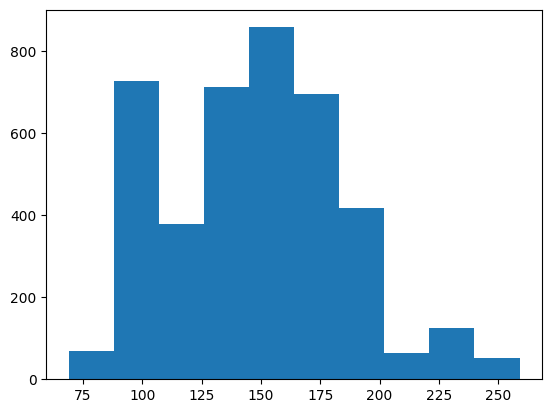

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

temp = df[(df['customs_description'] == 'Ladies > Leather Jackets') & (df['price_inc'] <= 260) & (df['price_inc'] >= 39)]

x = temp['price_inc']

# create the histogram
(n, bins, patches) = plt.hist(x, bins=10, label='hst')
bins

In [20]:
df[(df['customs_description'] == 'Ladies > Leather Jackets') & (df['price_inc'] >= 260)]

,order_date,order_id,quantity,order_state,grand_total_inc,reference,price_inc,date,Channel,title,...,Size,customs_description,colour,F_Cat,S_Cat,T_Cat,Category,Order fees total amount,time,Month
5,2021-01-01 15:18:41,26283,1,Order Dispatched,331.55,2186104,349.0,2021-01-01,Leather Company,Toscana Suede Leather Biker Gilet Black : Kimi,...,14,Ladies > Leather Jackets,Black,Ladies > Leather Jackets,NaN,NaN,Ladies > Ladies Jackets & Coats,NaN,NaN,January
110,2021-01-04 10:51:19,26419,1,Order Dispatched,499.00,2351705,499.0,2021-01-04,Leather Company,Long Reversible Sheepskin Gillet Grey: Elixia,...,16,Ladies > Leather Jackets,Grey,Ladies > Leather Jackets,NaN,NaN,NaN,NaN,NaN,January
126,2021-01-04 11:14:39,26417,1,Order Dispatched,569.05,2693504,599.0,2021-01-04,Leather Company,Hooded Long Suede Toscana Gilet Whisky: Mariana,...,14,Ladies > Leather Jackets,Whisky,Ladies > Leather Jackets,NaN,NaN,Ladies > Ladies Jackets & Coats,NaN,NaN,January
150,2021-01-05 12:30:05,26461,1,Order Refunded,280.00,3036406,280.0,2021-01-05,Leather Company,Vegetable Tanned Leather Biker Jacket White : ...,...,18,Ladies > Leather Jackets,White,Ladies > Leather Jackets,NaN,NaN,Ladies > Ladies Jackets & Coats,NaN,NaN,January
154,2021-01-05 14:20:19,26469,1,Order Dispatched,850.00,771304,850.0,2021-01-05,Leather Company,Long Length Toscana Suede Leather Coat tan : A...,...,14,Ladies > Leather Jackets,Tan,Ladies > Leather Jackets,NaN,NaN,Ladies > Ladies Jackets & Coats,NaN,NaN,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20935,2023-12-27 14:10:01,75070,1,Order Dispatched,1384.60,767702,625.0,2023-12-27,Leather Company,Toscana Longhaired Shearling Jacket Large Hood...,...,10,Ladies > Leather Jackets,Tan,Ladies > Leather Jackets,NaN,NaN,Ladies > Ladies Jackets & Coats,NaN,NaN,December
20936,2023-12-27 14:10:01,75070,1,Order Dispatched,1384.60,2188504,349.0,2023-12-27,Leather Company,Toscana Suede Leather Biker Gilet Tan : Kimi,...,14,Ladies > Leather Jackets,Tan,Ladies > Leather Jackets,NaN,NaN,Ladies > Ladies Jackets & Coats,NaN,NaN,December
20979,2023-12-28 12:52:13,75127,1,Order Dispatched,269.10,4969606,299.0,2023-12-28,Leather Company,Reversible Toscana Suede Leather Gilet Green :...,...,18,Ladies > Leather Jackets,Green,Ladies > Leather Jackets,NaN,NaN,Ladies > Ladies Waistcoats,NaN,NaN,December
20985,2023-12-29 18:58:54,75219,1,Order Dispatched,269.10,1660801,299.0,2023-12-29,Leather Company,Reversible Toscana Suede Leather Gilet Whisky ...,...,8,Ladies > Leather Jackets,Whisky,Ladies > Leather Jackets,NaN,NaN,Ladies > Ladies Waistcoats,NaN,NaN,December


In [14]:
temp.describe()

,quantity,grand_total_inc,reference,price_inc,date,line,S_Cat,T_Cat,Order fees total amount
count,4713.000000,4713.000000,4.713000e+03,4713.000000,4713,4713.000000,0.0,0.0,0.0
mean,1.000424,225.911287,3.067608e+06,200.008973,2022-07-08 07:09:35.175047680,58075.747719,NaN,NaN,NaN
min,1.000000,20.540000,3.915010e+05,69.000000,2021-01-01 00:00:00,30725.000000,NaN,NaN,NaN
25%,1.000000,129.000000,1.860106e+06,129.000000,2021-11-18 00:00:00,43930.000000,NaN,NaN,NaN
50%,1.000000,159.000000,3.734006e+06,149.990000,2022-05-04 00:00:00,55687.000000,NaN,NaN,NaN
75%,1.000000,213.750000,4.170104e+06,189.000000,2023-02-17 00:00:00,72852.000000,NaN,NaN,NaN
max,2.000000,3757.000000,4.975005e+06,2874.000000,2023-12-31 00:00:00,89743.000000,NaN,NaN,NaN
std,0.020598,226.523426,1.353230e+06,180.201590,NaN,16574.265752,NaN,NaN,NaN
